<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 2
:</span> ABT Construction</h1>
<hr>
Welcome to the workbook for <span style="color:royalblue">Module 2: ABT Construction</span>! 

In this module, we're going to combine the **Data Cleaning** and **Feature Engineering** steps from Project 2.

Remember, **better data beats better algorithms**.


<br><hr id="toc">

### In this module...

In this module, we'll cover the essential steps for building your analytical base table:
1. [Drop unwanted observations](#drop)
2. [Fix structural errors](#structural)
3. [Handle missing data](#missing-data)
4. [Engineer features](#engineer-features)
5. [Save the ABT](#save-abt)

Finally, we'll save the ABT to a new file so we can use it in other modules.

<br><hr>

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

We've provided comments for guidance.

In [4]:
# print_function for compatibility with Python 3

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

Next, let's import the dataset.
* The file path is <code style="color:crimson">'project_files/employee_data.csv'</code>

In [5]:
# Load employee data from CSV
df = pd.read_csv('project_files/employee_data.csv')
df.shape

(14249, 10)

Now we're ready to jump into cleaning the data!

<span id="drop"></span>
# 1. Drop unwanted observations

The first step to data cleaning is removing samples from your dataset that you don't want to include in the model.

<br>
**First, <span style="color:royalblue">drop duplicates</span> from the dataset.**
* Then, print the shape of the new dataframe.

In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df.shape # <- (14221, 10) -- yes, the rows# decreases

(14221, 10)

**Display all of the unique classes of the <code style="color:steelblue">'department'</code> feature**

In [7]:
# Unique classes of 'department'
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

**Drop all observations that belong to the <span style="color:crimson">'temp'</span> department.**
* **Hint:** This is the same as keeping all that don't belong to that department.
* **Hint:** Remember to overwrite your original dataframe.
* Then, print the shape of the new dataframe.

In [8]:
# Drop temporary workers
df = df[df.department != 'temp']
df.shape

(14068, 10)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="structural"></span>
# 2. Fix structural errors

The next bucket under data cleaning involves fixing structural errors, which arise during measurement, data transfer, or other types of "poor housekeeping."

<br>
**Print the unique values of <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code>.**

In [9]:
# Print unique values of 'filed_complaint'
print(df.filed_complaint.unique())
# Print unique values of 'recently_promoted'
print(df.recently_promoted.unique())

[nan  1.]
[nan  1.]


**Fill missing <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code> values with <code style="color:crimson">0</code>.**

In [10]:
# Missing filed_complaint values should be 0
df.filed_complaint.fillna(value=0, inplace=True)
# Missing recently_promoted values should be 0
df.recently_promoted.fillna(value=0, inplace=True)

**Print the unique values of <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code> again, just to confirm.**

In [11]:
# Print unique values of 'filed_complaint'
print(df.filed_complaint.unique())
# Print unique values of 'recently_promoted'
print(df.recently_promoted.unique())

[0. 1.]
[0. 1.]


**Replace any instances of <code style="color:crimson">'information_technology'</code> with <code style="color:crimson">'IT'</code> instead.**
* Remember to do it **inplace**.
* Then, plot the **bar chart** for <code style="color:steelblue">'department'</code> to see its new distribution.

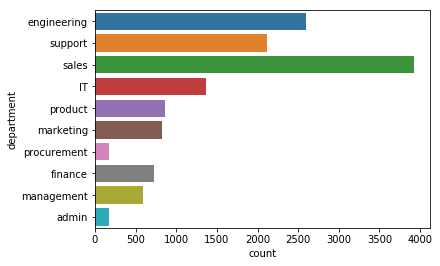

In [12]:
# 'information_technology' should be 'IT'
df.department.replace('information_technology', 'IT', inplace=True)

# Plot class distributions for 'department'
sns.countplot(data=df, y='department')

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="missing-data"></span>
# 3. Handle missing data

Next, it's time to handle **missing data**. 

<br>
**Display the <span style="color:royalblue">number of missing values</span> for each feature (both categorical and numeric).**

In [13]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

**Label missing values in <code style="color:steelblue">'department'</code> as <code style="color:crimson">'Missing'</code>.**
* By the way, the <code style="color:steelblue">.fillna()</code> function also has an <code style="color:steelblue">inplace=</code> argument, just like the <code style="color:steelblue">.replace()</code> function.
* In the previous project, we just overwrote that column. This time, try using the <code style="color:steelblue">inplace=</code> argument instead.

In [14]:
# Fill missing values in department with 'Missing'
df.department.fillna(value='Missing', inplace=True)
df.department.unique() # sanity check

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'procurement', 'finance', 'Missing', 'management', 'admin'],
      dtype=object)

**First, let's flag <code style="color:steelblue">'last_evaluation'</code> with an indicator variable of missingness.** 
* <code style="color:crimson">0</code> if not missing.
* <code style="color:crimson">1</code> if missing. 

Let's name the new indicator variable <code style="color:steelblue">'last_evaluation_missing'</code>.
* We can use the <code style="color:steelblue">.isnull()</code> function.
* Also, remember to convert it with <code style="color:steelblue">.astype(int)</code>

In [15]:
# Indicator variable for missing last_evaluation
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

In [16]:
# checkin' rows# (and cols#) of columns with type -> can use .shape property ;)
df[df.last_evaluation_missing == 1].shape

(1351, 11)

**Then, simply fill in the original missing value with <code style="color:crimson">0</code> just so your algorithms can run properly.**

In [17]:
# Fill missing values in last_evaluation with 0
df.last_evaluation.fillna(0, inplace=True)

**Display the number of missing values for each feature (both categorical and numeric) again, just to confirm.**

In [18]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="engineer-features"></span>
# 4. Engineer features

For this project, we're going to have an abbreviated version of feature engineering, since we've already covered many tactics in Project 2.

<br>
Do you remember the scatterplot of <code style="color:steelblue">'satisfaction'</code> and <code style="color:steelblue">'last_evaluation'</code> for employees who have <code style="color:crimson">'Left'</code>?

**Let's reproduce it here, just so we have it in front of us.**

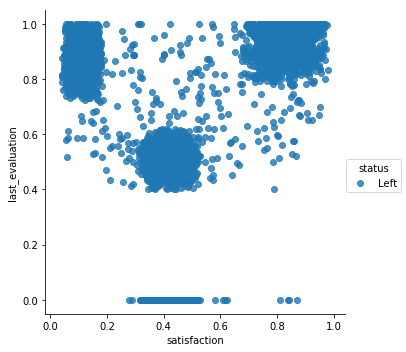

In [19]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(data=df[df.status == 'Left'], x='satisfaction', y='last_evaluation', hue='status', fit_reg=False)

These roughly translate to 3 **indicator features** we can engineer:

* <code style="color:steelblue">'underperformer'</code> - last_evaluation < 0.6 and last_evaluation_missing == 0
* <code style="color:steelblue">'unhappy'</code> - satisfaction_level < 0.2
* <code style="color:steelblue">'overachiever'</code> - last_evaluation > 0.8 and satisfaction > 0.7

<br>
**Create those 3 indicator features.**
* Use boolean masks.
* **Important:** For <code style="color:steelblue">'underperformer'</code>, it's important to include <code style="color:steelblue">'last_evaluation_missing' == 0</code> to avoid those originally missing observations that we flagged and filled.

In [20]:
# Create indicator features
df['underperformer'] = ((df.last_evaluation < 0.6) & (df.last_evaluation_missing == 0)).astype(int)
df['unhappy'] = (df.satisfaction < 0.2).astype(int)
df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

<br>
**Next, run this code to check that you created the features correctly.**

In [21]:
# The proportion of observations belonging to each group
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="save-abt"></span>
# 5. Save the ABT

Finally, let's save the **analytical base table**. 

<br>
**Convert <code style="color:steelblue">'status'</code> into an indicator variable.**
* <code style="color:crimson">'Left'</code> should be <code style="color:crimson">1</code>
* <code style="color:crimson">'Employed'</code> should be <code style="color:crimson">0</code>
* There's also a really easy way you can use <code style="color:steelblue">pd.get_dummies()</code> here. See below.

In [22]:
pd.get_dummies?

In [23]:
 # Convert status to an indicator variable
df['status'] = pd.get_dummies( df.status ).Left

**To confirm we did that correctly, display the proportion of people in our dataset who left.**

In [24]:
# The proportion of observations who 'Left'
len(df[df.status == 1]) / len(df)

0.23933750355416547

**Overwrite your dataframe with a version that has <span style="color:royalblue">dummy variables</span> for the categorical features.**
* Then, display the first 10 rows to confirm all of the changes we've made so far in this module.

In [25]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,1,5.0,0,0,0,1
1,232,support,0.0,0.000000,3,0.0,low,0.834544,0,2.0,1,0,0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,0,3.0,0,0,0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,0,2.0,0,1,0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,0,3.0,0,0,0,1


In [26]:
# Create new dataframe with dummy features
df = df.join(pd.get_dummies(df.department, prefix="department"))
df = df.join(pd.get_dummies(df.salary, prefix="salary"))

# Drop old/raw categorical columns
df.drop(columns=['department', 'salary'], inplace=True)

# Display first 10 rows
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,1,...,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,1


**Save this dataframe as your <span style="color:royalblue">analytical base table</span> to use in later modules.**
* Remember to set the argument <code style="color:steelblue">index=None</code> to save only the data.

In [27]:
# Save analytical base table
df.to_csv('project_files/analytical_base_table.csv', index=None)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<br>
## Next Steps

Congratulations for making through Project 3's ABT Construction module!

As a reminder, here are a few things you did in this module:
* You cleaned dropped irrelevant observations from the dataset.
* You fixed various structural errors, such as wannabe indicator variables.
* You handled missing data.
* You engineered features by leveraging your exploratory analysis.
* And you created dummy variables before saving the ABT.

In the next module, <span style="color:royalblue">Module 3: Classification Algorithms</span>, we'll take a detour from the project and dive into some more machine learning concepts. We'll also introduce the classification algorithms we'll be using for this project.

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>